In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import random
from PIL import Image

import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,BatchNormalization,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

Using TensorFlow backend.


In [2]:
print(os.listdir('../input/10-monkey-species'))

['validation', 'monkey_labels.txt', 'training']


In [3]:
TRAIN_FOLDER = os.listdir('../input/10-monkey-species/training/training/')
VALID_FOLDER = os.listdir('../input/10-monkey-species/validation/validation/')

In [4]:
cols = ['Label','Latin Name','Common Name','Train Images','Validation Images']

df = pd.read_csv('../input/10-monkey-species/monkey_labels.txt',names=cols,skiprows=1)
df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [5]:
df.columns

Index(['Label', 'Latin Name', 'Common Name', 'Train Images',
       'Validation Images'],
      dtype='object')

In [6]:
labels = df['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [7]:
sample_train_imgs = list(os.walk('../input/10-monkey-species/training/training/n0/'))[0][2][:4]

In [8]:
sample_train_imgs

['n0018.jpg', 'n0047.jpg', 'n0046.jpg', 'n0148.jpg']

In [9]:
sample_train_imgs =  list(map(lambda x: os.path.join('../input/10-monkey-species/training/training/n0/',x),sample_train_imgs))

In [10]:
sample_train_imgs

['../input/10-monkey-species/training/training/n0/n0018.jpg',
 '../input/10-monkey-species/training/training/n0/n0047.jpg',
 '../input/10-monkey-species/training/training/n0/n0046.jpg',
 '../input/10-monkey-species/training/training/n0/n0148.jpg']

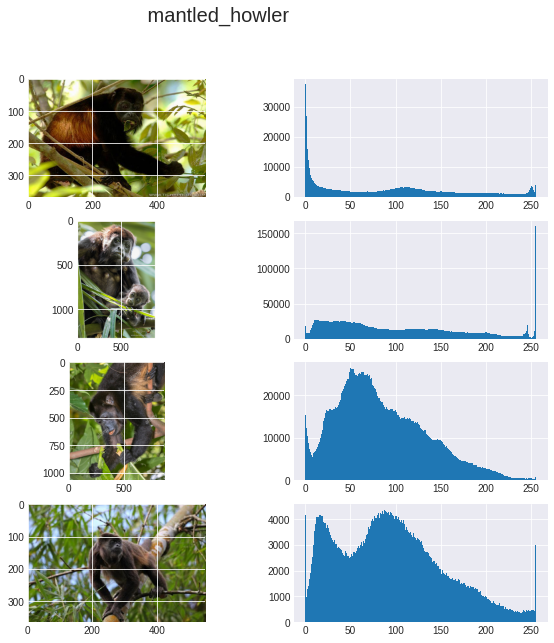

In [11]:
plt.style.use('seaborn-darkgrid')
fig,ax = plt.subplots(4,2,figsize=(10,10))

for i in range(len(sample_train_imgs)):
    image = Image.open(sample_train_imgs[i])
    img = img_to_array(image)
    ax[i,0].imshow(image)
    ax[i,1].hist(img.ravel(),256,[0,256])
    #ax[i,0].axis("off")
    
    
plt.suptitle(labels[0],size=20)
plt.show()    

In [14]:
train_gen = ImageDataGenerator(rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=[0.9, 1.25],
    brightness_range=[0.5, 1.5])

train_data = train_gen.flow_from_directory('../input/10-monkey-species/training/training/',
                                           target_size=(224,224),batch_size=64,shuffle=True,class_mode='categorical')
print("data groups: ",len(train_data))


test_gen = ImageDataGenerator(rescale=1./255)
valid_data = test_gen.flow_from_directory('../input/10-monkey-species/validation/validation/',target_size=(224,224),
                                          batch_size=64,shuffle=False,class_mode='categorical')
print("data groups: ",len(valid_data))

Found 1098 images belonging to 10 classes.
data groups:  18
Found 272 images belonging to 10 classes.
data groups:  5


In [15]:
model = Sequential()

BASIS CNN MODEL

In [16]:
#1st layer
model.add(Conv2D(64,(3,3),padding='same',strides=(1,1),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D((2,2)))

#2nd layer
model.add(Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu'))
model.add(MaxPool2D((2,2)))

#3rd layer
model.add(Conv2D(128,(3,3),padding='same',strides=(1,1),activation='relu'))
model.add(MaxPool2D((2,2)))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)           

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
history = model.fit_generator(train_data,validation_data=valid_data,epochs=10)

Epoch 1/10
18/18 [==============================] - 249s 14s/step - loss: 4.4320 - accuracy: 0.1403 - val_loss: 1.9460 - val_accuracy: 0.1029
Epoch 2/10
18/18 [==============================] - 247s 14s/step - loss: 2.3203 - accuracy: 0.1066 - val_loss: 2.4006 - val_accuracy: 0.0956
Epoch 3/10
18/18 [==============================] - 245s 14s/step - loss: 2.3054 - accuracy: 0.1148 - val_loss: 2.3237 - val_accuracy: 0.1360
Epoch 4/10
18/18 [==============================] - 246s 14s/step - loss: 2.2850 - accuracy: 0.1566 - val_loss: 2.1505 - val_accuracy: 0.1287
Epoch 5/10
18/18 [==============================] - 245s 14s/step - loss: 2.2196 - accuracy: 0.1976 - val_loss: 2.0085 - val_accuracy: 0.2096
Epoch 6/10
18/18 [==============================] - 246s 14s/step - loss: 2.0967 - accuracy: 0.2304 - val_loss: 1.6439 - val_accuracy: 0.2684
Epoch 7/10
18/18 [==============================] - 244s 14s/step - loss: 2.1113 - accuracy: 0.2240 - val_loss: 2.3536 - val_accuracy: 0.2390
Epoch 

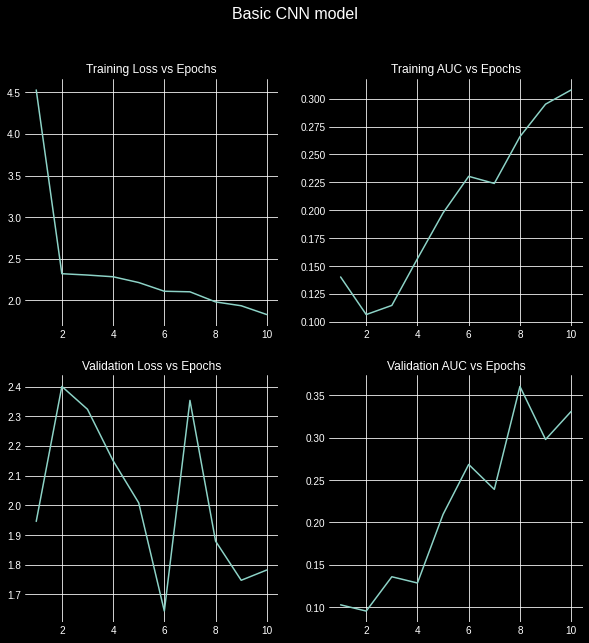

In [31]:
plt.style.use('dark_background')

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 11), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 11), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('Basic CNN model', size=16)
plt.show()

In [38]:
test_acc = model.evaluate_generator(valid_data,20)

In [39]:
print('The testing accuracy is :',test_acc[1]*100, '%')

The testing accuracy is : 33.088234066963196 %


Kind of poor accuracy i know😥😥😥 but there's a clear pattern by increasing the number of epochs accuracy will increase since it's for learning purpose i didn't bother to use more than 10 epochs.